In [5]:
import pickle
import os
import commonFunctions as cf
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

In [6]:
o3File='D://Archived/Cancer/Data/o3'
tempFile='D://Archived/Cancer/Data/TEMP'
windFile='D://Archived/Cancer/Data/WIND'
rhdpFile='D://Archived/Cancer/Data/RH_DP'
syear=1980
eyear=2017

In [7]:
def warpIntoLists(temp,maxr,year):
    finalList=[]
    tempList=[]
    yticks=[]
    n=math.ceil(len(temp)/maxr)
    append=maxr*n-len(temp)
    tempList=[temp[i] for i in temp]
    toappend=[-1 for i in range(append)]
    tempN=len(toappend)
    temptempList=[]
    if maxr*2>len(tempList):
        tempList=toappend[0:tempN//2]+tempList+toappend[tempN//2:tempN]
    else:  
        tempList=tempList[0:maxr*(n-1)]+toappend[0:tempN//2]+tempList[maxr*(n-1):]+toappend[tempN//2:tempN]
    fool=0
    for i in range(0,len(tempList),maxr):
        finalList.append(tempList[i:i+maxr])
        if fool==0:
            yticks.append(year)
            fool=1
        else:
            yticks.append('')
    return finalList,yticks

In [3]:
try:
    corrData=pickle.load(open('Temp/corrData.pickle','rb'))
except:    
    corrData=OrderedDict()
    lengthList=[]
    for year in range(syear,eyear+1):    
        o3List=os.listdir(o3File+"/{}".format(year))
        tempList=os.listdir(tempFile+"/{}".format(year))
        if year not in corrData:
            corrData[year]=OrderedDict()
        common=set(o3List).intersection(set(tempList))
        print(len(common))
        for county in common:
            o3Data=pickle.load(open('{}/{}/{}'.format(o3File,year,county),'rb'))
            tempData=pickle.load(open('{}/{}/{}'.format(tempFile,year,county),'rb'))
            corr,length=cf.correlation(o3Data,tempData,gaps=True)
            lengthList.append(length)
            if length>=100 and corr!=0.00:
                corrData[year][county]=corr   
    pickle.dump(corrData,open('Temp/corrData.pickle','wb'))

91
81


c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:2998: RuntimeWarning: Mean of empty slice.
  mx = x.mean()
c:\program files (x86)\python36-32\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:2999: RuntimeWarning: Mean of empty slice.
  my = y.mean()
c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:5240: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


72
77
76
58
64
87
94
115
127
169
176


c:\program files (x86)\python36-32\lib\site-packages\scipy\stats\stats.py:3013: RuntimeWarning: invalid value encountered in double_scalars
  prob = _betai(0.5*df, 0.5, df/(df+t_squared))


209
239
305
324
346
366
369
390
403
410
429
442
446
453
482
492
502
514
553
573
548
533
544
560
550


In [167]:
def plotHeatmap(plt,data,nyticks):
    plt.close()
    plt.clf()
    plt.subplots(figsize=(18,8),dpi=300)
    ax = sns.heatmap(data, vmin=-1, vmax=1,cmap='Purples',linewidth=0.1,square=True,cbar_kws={"shrink": 0.5})
    plt,ax=setplot(plt,ax)
    ax.text(-0.04, 1.05, 'a)', transform=ax.transAxes, size=15,color='purple')

    ax.xaxis.set_visible(False)
    plt.yticks([i+0.5 for i in range(len(data))],[i for i in nyticks],size=4.8,rotation=0)
    ax.yaxis.set_ticks_position('none') 

    plt.xlabel('Counties',size=16)
    plt.savefig('Com/images/temp.png',bbox_inches='tight')
    plt.show()
    
def plotScatter(data):
    count=0
    plt.close()
    plt,ax=setplot(plt)
    plt.subplots(figsize=(10,10),dpi=200)
    for year in data:
        corrList=data[year]
        plt.scatter([count for i in corrList if corrList[i]!=0.0],[corrList[i] for i in corrList if corrList[i]!=0.0],color='b',s=5)
        count+=1
    plt.show()
    
def setplot(plt,ax):

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax

def plotHeatmapBar(plt,data,nxticks):
    plt.close()
    plt.subplots(figsize=(18,4),dpi=300)

    ax = sns.heatmap(data, vmin=0, vmax=1,cmap='Greens',linewidth=0.1,square=True,cbar_kws={"shrink": 0.5,"orientation": "horizontal"})
    plt,ax=setplot(plt,ax)
    ax.text(-0.04, 1.05, 'b)', transform=ax.transAxes, size=15,color='purple')

    plt.yticks([i-0.5 for i in range(len(data))],[''])
    plt.xticks([i+0.5 for i in range(len(data[0]))],[i for i in nxticks],size=9)
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    plt.ylabel('r($O_{3}$,θ)',size=12,rotation=90)
    plt.savefig('Com/images/tempBar.png',bbox_inches='tight')
    plt.show()

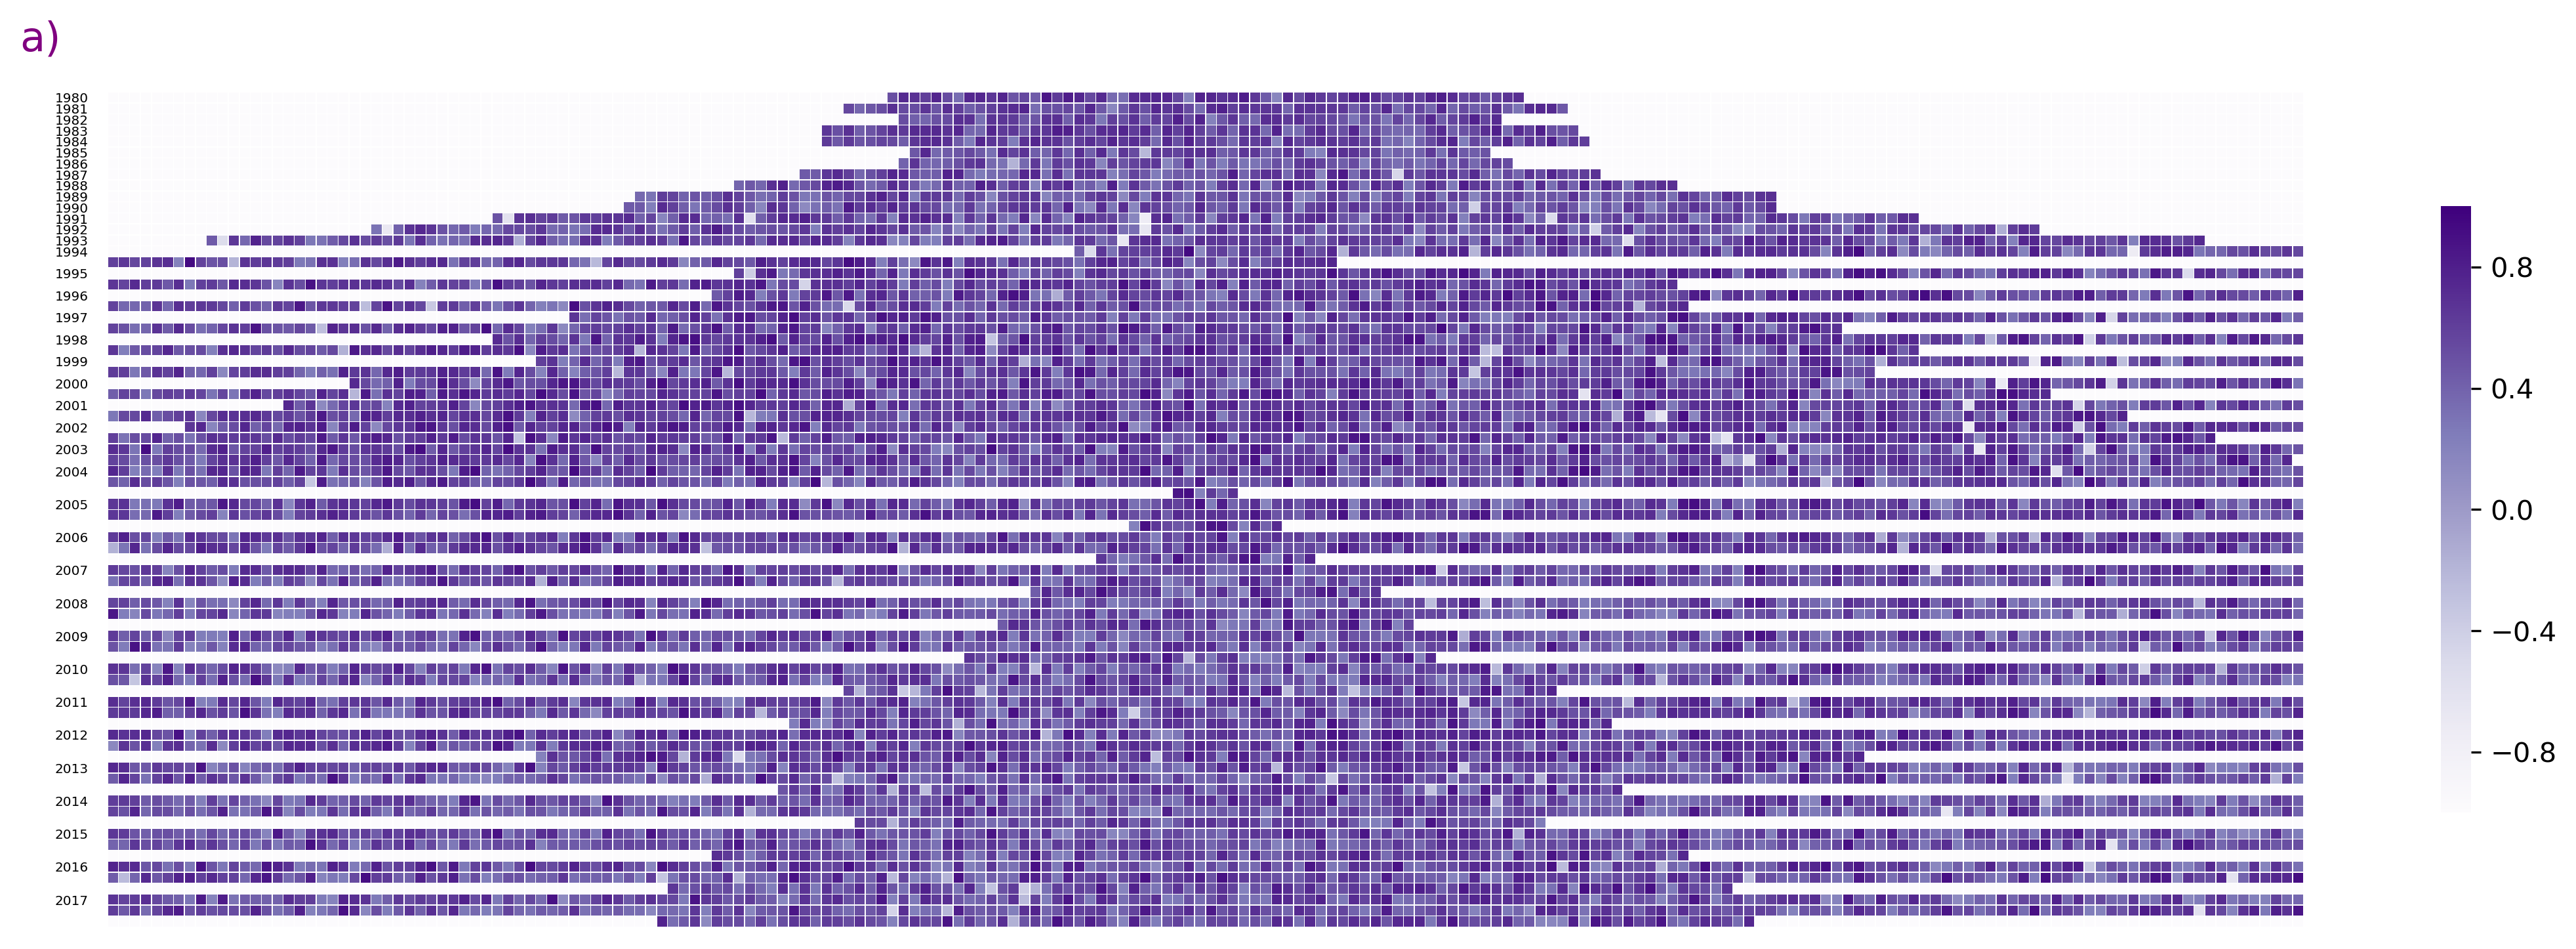

In [166]:
ndata,nyticks=[],[]
yearList=[]
import math
    
for year in corrData:
    finalList,yticks=warpIntoLists(corrData[year],200,year)
    ndata.extend(finalList)
    nyticks.extend(yticks)
    
plotHeatmap(plt,ndata,nyticks)
# plotScatter(corrData)

In [92]:
try:
    yearCorr=pickle.load(open('Temp/yearCorr.pickle','rb'))
except:
    yearCorr=OrderedDict()
    lengthList=[]
    for year in range(syear,eyear+1):    
        o3List=os.listdir(o3File+"/{}".format(year))
        tempList=os.listdir(tempFile+"/{}".format(year))
        if year not in yearCorr:
            yearCorr[year]=[[],[]]
        common=set(o3List).intersection(set(tempList))
        print(len(common))
        for county in common:
            o3Data=pickle.load(open('{}/{}/{}'.format(o3File,year,county),'rb'))
            tempData=pickle.load(open('{}/{}/{}'.format(tempFile,year,county),'rb'))
            yearCorr[year][0].extend(o3Data)
            yearCorr[year][1].extend(tempData)
        corr,length=cf.correlation(yearCorr[year][0],yearCorr[year][1],gaps=True)
        lengthList.append(length)
        if length>=100 and corr!=0.00:
            yearCorr[year]=corr   
    pickle.dump(yearCorr,open('Temp/yearCorr.pickle','wb'))

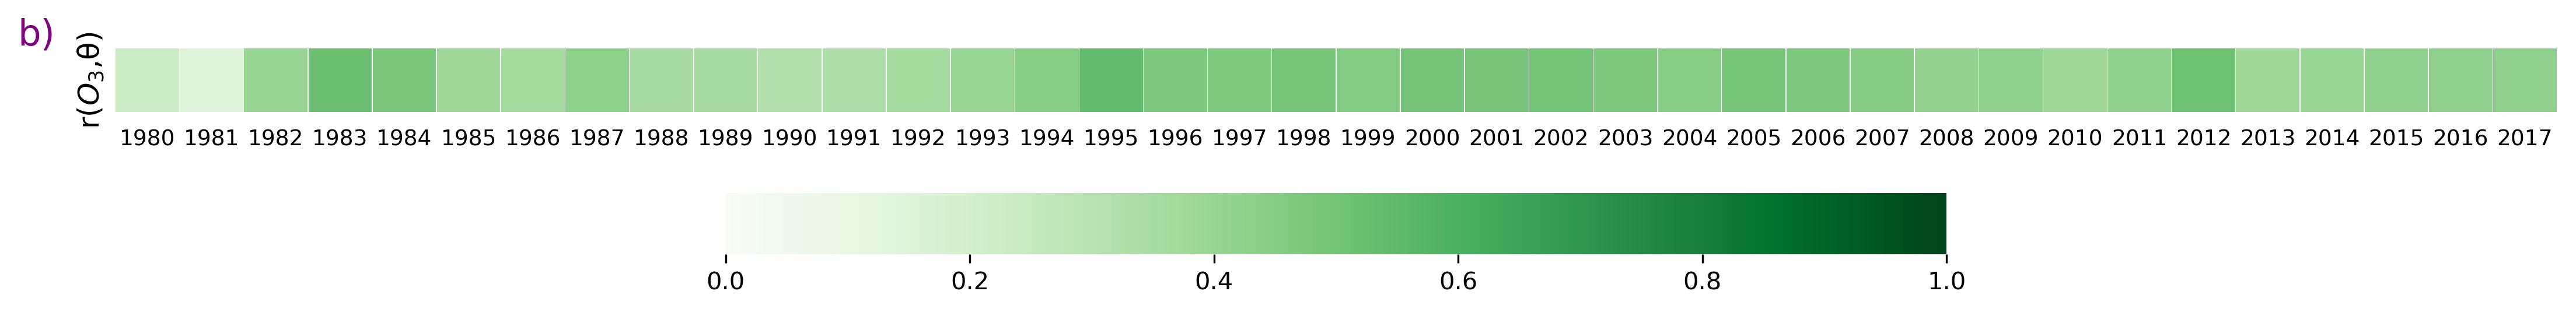

In [168]:
plotHeatmapBar(plt,[[yearCorr[i] for i in yearCorr]],[i for i in yearCorr]) 

In [169]:
yearCorr

OrderedDict([(1980, 0.23103687006685519),
             (1981, 0.14886901534070923),
             (1982, 0.39914936354124031),
             (1983, 0.5169954409423424),
             (1984, 0.48055295142162885),
             (1985, 0.38425630718389903),
             (1986, 0.36664655400901769),
             (1987, 0.43289638410690506),
             (1988, 0.35344829579040282),
             (1989, 0.35238361894924503),
             (1990, 0.3234265337926347),
             (1991, 0.33364878629450978),
             (1992, 0.37087059178728987),
             (1993, 0.3946498412183696),
             (1994, 0.44682159014545131),
             (1995, 0.54039914989963755),
             (1996, 0.47530648877164172),
             (1997, 0.46668560802409398),
             (1998, 0.49141875106379507),
             (1999, 0.45346381636142363),
             (2000, 0.49637445745569758),
             (2001, 0.48696174087147204),
             (2002, 0.50252971208238961),
             (2003, 0.478176479364695

In [62]:
145*4

580

In [33]:
sns.reset_defaults()